In [1]:
#Imports
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.expected_returns import mean_historical_return
from pypfopt import plotting
from pypfopt.risk_models import risk_matrix
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import seaborn as sns
import scipy.optimize as sco

In [2]:
#Download Daily Price Data for 
    #META, AMAZON, (Palmy)
    #MICROSOFT, ALPHABET (matt)
    #APPLE & NDX 100 (Josh)

# Define the stock symbol
stock_symbol_aapl = "AAPL"  # Change this to the desired stock symbol

# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days

# Fetch historical price data
stock_data_aapl = yf.download(stock_symbol_aapl, start=start_date, end=end_date)

# Print the retrieved data
stock_data_aapl


[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-08-20   18.203930   18.234644   17.886429   17.895357   15.618193   
2013-08-21   17.985357   18.112499   17.900000   17.941429   15.658404   
2013-08-22   18.035000   18.056786   17.792856   17.962856   15.677104   
2013-08-23   17.973928   17.976786   17.833929   17.893572   15.616632   
2013-08-26   17.883928   18.221430   17.875000   17.963215   15.677415   
...                ...         ...         ...         ...         ...   
2023-08-11  177.320007  178.619995  176.550003  177.789993  177.789993   
2023-08-14  177.970001  179.690002  177.309998  179.460007  179.460007   
2023-08-15  178.880005  179.479996  177.050003  177.449997  177.449997   
2023-08-16  177.130005  178.539993  176.500000  176.570007  176.570007   
2023-08-17  177.139999  177.509995  173.479996  174.000000  174.000000   

               Volume  
Date                   
2013-08-20  358688400  
2013-08-21  335879600  
2013-08-22  244207600  
2013-08-23  222731600  
2013-08-26  330965600  
...               ...  
2023-08-11   51988100  
2023-08-14   43675600  
2023-08-15   43622600  
2023-08-16   46964900  
2023-08-17   65956000  

[2516 rows x 6 columns]

In [3]:
#Drop Nulls. Remove high, low, open data. 
print(stock_data_aapl.isnull().sum())
stock_data_aapl = stock_data_aapl.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_aapl

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Adj Close
Date                  
2013-08-20   15.618193
2013-08-21   15.658404
2013-08-22   15.677104
2013-08-23   15.616632
2013-08-26   15.677415
...                ...
2023-08-11  177.789993
2023-08-14  179.460007
2023-08-15  177.449997
2023-08-16  176.570007
2023-08-17  174.000000

[2516 rows x 1 columns]

In [4]:
#Generate Daily returns
daily_returns_aapl = stock_data_aapl.pct_change()

daily_returns_aapl.head(20)

Adj Close
Date                 
2013-08-20        NaN
2013-08-21   0.002575
2013-08-22   0.001194
2013-08-23  -0.003857
2013-08-26   0.003892
2013-08-27  -0.028590
2013-08-28   0.004728
2013-08-29   0.001629
2013-08-30  -0.009111
2013-09-03   0.002792
2013-09-04   0.020692
2013-09-05  -0.006858
2013-09-06   0.005956
2013-09-09   0.015957
2013-09-10  -0.022779
2013-09-11  -0.054444
2013-09-12   0.010648
2013-09-13  -0.016480
2013-09-16  -0.031792
2013-09-17   0.011552

In [5]:
#Drop Nulls
daily_returns_aapl = daily_returns_aapl.dropna()

daily_returns_aapl.head(10)



Adj Close
Date                 
2013-08-21   0.002575
2013-08-22   0.001194
2013-08-23  -0.003857
2013-08-26   0.003892
2013-08-27  -0.028590
2013-08-28   0.004728
2013-08-29   0.001629
2013-08-30  -0.009111
2013-09-03   0.002792
2013-09-04   0.020692

In [6]:
# Plot Daily returns on hvplot.line
daily_returns_aapl.hvplot(
    x='Date',
    y='Adj Close'
)

:Curve   [Date]   (Adj Close)

In [7]:
# Calculate cumulative returns of all portfolios
cum_returns_aapl = (1 + daily_returns_aapl).cumprod(axis=0)
cum_returns_aapl

# Plot cumulative returns
cum_returns_aapl.hvplot(
    width=1000,
    height=500
)

:Curve   [Date]   (Adj Close)

In [8]:
#Calculate varience
variance_aapl = daily_returns_aapl.var()
variance_aapl


Adj Close    0.000323
dtype: float64

In [9]:
# Calculate the annualized `std`
aapl_std_dev_percentage = daily_returns_aapl.std() * np.sqrt(252)
aapl_std_dev_percentage

Adj Close    0.285104
dtype: float64

In [10]:
# Define the stock symbol
stock_symbol_ndx = "NDX"  # Change this to the desired stock symbol

# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days

# Fetch historical price data
stock_data_ndx = yf.download(stock_symbol_ndx, start=start_date, end=end_date)

# Print the retrieved data
stock_data_ndx

[*********************100%%**********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2013-08-20   3077.149902   3096.419922   3073.050049   3082.169922   
2013-08-21   3073.239990   3098.620117   3061.419922   3071.469971   
2013-08-22   3085.610107   3103.639893   3085.419922   3101.820068   
2013-08-23   3126.250000   3127.050049   3112.870117   3124.270020   
2013-08-26   3127.010010   3147.870117   3118.520020   3122.669922   
...                  ...           ...           ...           ...   
2023-08-11  15010.519531  15102.530273  14973.669922  15028.070312   
2023-08-14  14988.419922  15206.259766  14972.009766  15205.589844   
2023-08-15  15172.080078  15192.879883  15014.360352  15037.650391   
2023-08-16  15021.629883  15077.049805  14874.019531  14876.469727   
2023-08-17  14943.339844  14949.580078  14698.290039  14715.809570   

               Adj Close      Volume  
Date                                  
2013-08-20   3082.169922  1308280000  
2013-08-21   3071.469971  1438510000  
2013-08-22   3101.820068   927400000  
2013-08-23   3124.270020  1499890000  
2013-08-26   3122.669922  1404230000  
...                  ...         ...  
2023-08-11  15028.070312  4638880000  
2023-08-14  15205.589844  4272020000  
2023-08-15  15037.650391  4473320000  
2023-08-16  14876.469727  6243760000  
2023-08-17  14715.809570  5280180000  

[2516 rows x 6 columns]

In [11]:
#Drop Nulls. Remove high, low, open data. 
print(stock_data_ndx.isnull().sum())
stock_data_ndx = stock_data_ndx.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_ndx

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Adj Close
Date                    
2013-08-20   3082.169922
2013-08-21   3071.469971
2013-08-22   3101.820068
2013-08-23   3124.270020
2013-08-26   3122.669922
...                  ...
2023-08-11  15028.070312
2023-08-14  15205.589844
2023-08-15  15037.650391
2023-08-16  14876.469727
2023-08-17  14715.809570

[2516 rows x 1 columns]

In [12]:
#Generate Daily returns
daily_returns_ndx = stock_data_ndx.pct_change()

daily_returns_ndx.head(20)

Adj Close
Date                 
2013-08-20        NaN
2013-08-21  -0.003472
2013-08-22   0.009881
2013-08-23   0.007238
2013-08-26  -0.000512
2013-08-27  -0.020204
2013-08-28   0.004115
2013-08-29   0.006897
2013-08-30  -0.006320
2013-09-03   0.005840
2013-09-04   0.010602
2013-09-05   0.001728
2013-09-06   0.001099
2013-09-09   0.011665
2013-09-10   0.004776
2013-09-11  -0.001636
2013-09-12  -0.001349
2013-09-13   0.000853
2013-09-16  -0.003017
2013-09-17   0.006987

In [13]:
#Drop Nulls
daily_returns_ndx = daily_returns_ndx.dropna()

daily_returns_ndx.head(10)

Adj Close
Date                 
2013-08-21  -0.003472
2013-08-22   0.009881
2013-08-23   0.007238
2013-08-26  -0.000512
2013-08-27  -0.020204
2013-08-28   0.004115
2013-08-29   0.006897
2013-08-30  -0.006320
2013-09-03   0.005840
2013-09-04   0.010602

In [14]:
# Plot Daily returns on hvplot.line
daily_returns_ndx.hvplot(
    x='Date',
    y=['Adj Close']
)

:Curve   [Date]   (Adj Close)

In [15]:
# Calculate cumulative returns of all portfolios
cum_returns_ndx = (1 + daily_returns_ndx).cumprod(axis=0)
cum_returns_ndx

# Plot cumulative returns
cum_returns_ndx.hvplot(
    width=1000,
    height=500
)

:Curve   [Date]   (Adj Close)

In [16]:
#Calculate varience
variance_ndx = daily_returns_ndx.var()
variance_ndx

Adj Close    0.000186
dtype: float64

In [17]:
# Calculate the annualized `std`
ndx_std_dev_percentage = daily_returns_ndx.std() * np.sqrt(252) * 100
ndx_std_dev_percentage

Adj Close    21.629251
dtype: float64

In [18]:
#Concat stock adjusted daily prices. Indexed on date

# Define the stock symbols
stock_symbols = [ "AAPL", "AMZN", "META", "GOOGL", "MSFT"]     # Change this to the desired stock symbol

# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days

# Fetch historical price data
stock_data_all = yf.download(stock_symbols, start=start_date, end=end_date)

#Drop irrelevant cells
stock_data_all = stock_data_all.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])

# Print the retrieved data
stock_data_all


[*********************100%%**********************]  5 of 5 completed


Adj Close                                                
                  AAPL        AMZN       GOOGL        META        MSFT
Date                                                                  
2013-08-20   15.618196   14.354500   21.657158   38.410000   26.479050
2013-08-21   15.658400   14.228500   21.755005   38.320000   26.470680
2013-08-22   15.677103   14.486500   21.864614   38.549999   27.123861
2013-08-23   15.616633   14.500500   21.777027   40.549999   29.100170
2013-08-26   15.677420   14.310500   21.681431   41.340000   28.597719
...                ...         ...         ...         ...         ...
2023-08-11  177.789993  138.410004  129.559998  301.640015  320.331787
2023-08-14  179.460007  140.570007  131.330002  306.190002  323.355408
2023-08-15  177.449997  137.669998  129.779999  301.950012  321.179962
2023-08-16  176.570007  135.070007  128.699997  294.290009  320.399994
2023-08-17  174.000000  133.979996  129.919998  285.089996  316.880005

[2516 rows x 5 columns]

In [19]:
mu = mean_historical_return(stock_data_all)
mu

Adj Close  AAPL     0.273210
           AMZN     0.250829
           GOOGL    0.196636
           META     0.222438
           MSFT     0.282371
dtype: float64

                Adj Close                                        
                     AAPL      AMZN     GOOGL      META      MSFT
Adj Close AAPL   0.081284  0.050347  0.047004  0.055796  0.050763
          AMZN   0.050347  0.109861  0.058854  0.071695  0.055565
          GOOGL  0.047004  0.058854  0.077690  0.066872  0.053008
          META   0.055796  0.071695  0.066872  0.143097  0.056778
          MSFT   0.050763  0.055565  0.053008  0.056778  0.074218


<AxesSubplot:>

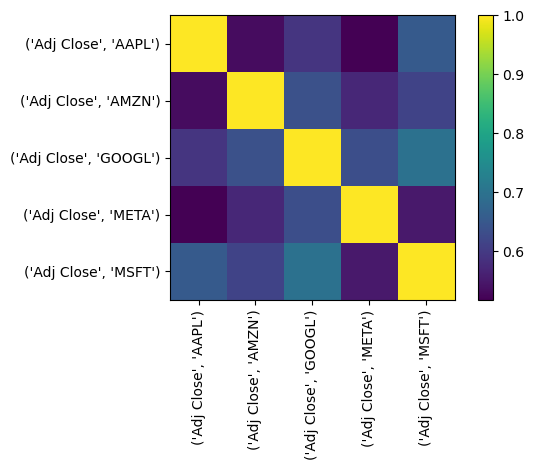

In [20]:
s = risk_matrix(stock_data_all, method='sample_cov')
print(s)
plotting.plot_covariance(s,show_tickers=True,plot_correlation=True)

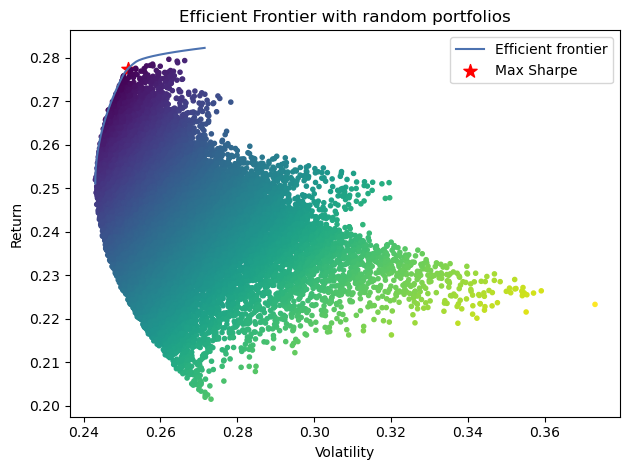

OrderedDict([(('Adj Close', 'AAPL'), 0.37339), (('Adj Close', 'AMZN'), 0.04715), (('Adj Close', 'GOOGL'), 0.0), (('Adj Close', 'META'), 0.0), (('Adj Close', 'MSFT'), 0.57946)])
Max Sharpe Portfolio Performance:
Expected Annual Return: 0.2774629917429076
Expected Annual Risk (Volatility): 0.2515415156466435
Sharpe Ratio: 0.9440310126638781


In [21]:
import copy 
ef = EfficientFrontier(mu, s)
# ef.add_objective(objective_functions.L2_reg, gamma=0.1)

ef_max_sharpe = copy.deepcopy(ef)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe(risk_free_rate=0.04)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate=0.04)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 25000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

# Get the weights of the maximum Sharpe ratio portfolio
max_sharpe_weights = ef_max_sharpe.clean_weights()
print(max_sharpe_weights)

# Get the portfolio performance metrics
ret_tangent, std_tangent, sharpe_tangent = ef_max_sharpe.portfolio_performance(risk_free_rate=0.04)

# Print the portfolio performance metrics
print("Max Sharpe Portfolio Performance:")
print("Expected Annual Return:", ret_tangent)
print("Expected Annual Risk (Volatility):", std_tangent)
print("Sharpe Ratio:", sharpe_tangent)

Expected annual return: 26.3%
Annual volatility: 24.8%
Sharpe Ratio: 0.90
OrderedDict([(('Adj Close', 'AAPL'), 0.3201427927438023), (('Adj Close', 'AMZN'), 0.1843452357999508), (('Adj Close', 'GOOGL'), 0.072681537571708), (('Adj Close', 'META'), 0.066777577682274), (('Adj Close', 'MSFT'), 0.3560528562022649)])


C:\Users\duke_\anaconda3\envs\alpacaenv\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


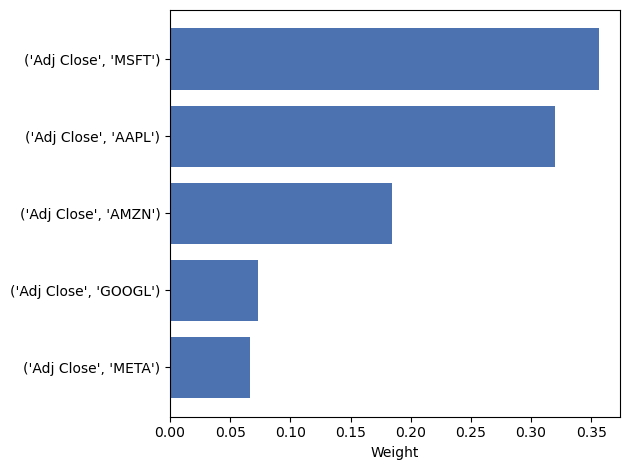

In [22]:
#Code below to confirm above data and retrict asset allocation. 
# Restricted to min 0.01 asset allocation and plot assets weights

mu_2 = mean_historical_return(stock_data_all)
s_2 = risk_matrix(stock_data_all, method='sample_cov')

ef_2 = EfficientFrontier(mu_2, s_2)
ef_2.add_objective(objective_functions.L2_reg, gamma=0.1)
weights_2 = ef_2.max_sharpe(risk_free_rate=0.04) 
ef_2.portfolio_performance(verbose=True, risk_free_rate=0.04)
plotting.plot_weights(weights_2)
print(weights_2)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annulised Return: 0.28
Annulaised Volatility: 0.25


           Adj Close                         
                AAPL  AMZN GOOGL  META   MSFT
allocation     37.98  9.05  0.52  1.72  50.73
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annulised Return: 0.27
Annulaised Volatility: 0.24


           Adj Close                          
                AAPL  AMZN  GOOGL  META   MSFT
allocation     31.38  8.41  28.03  0.35  31.83


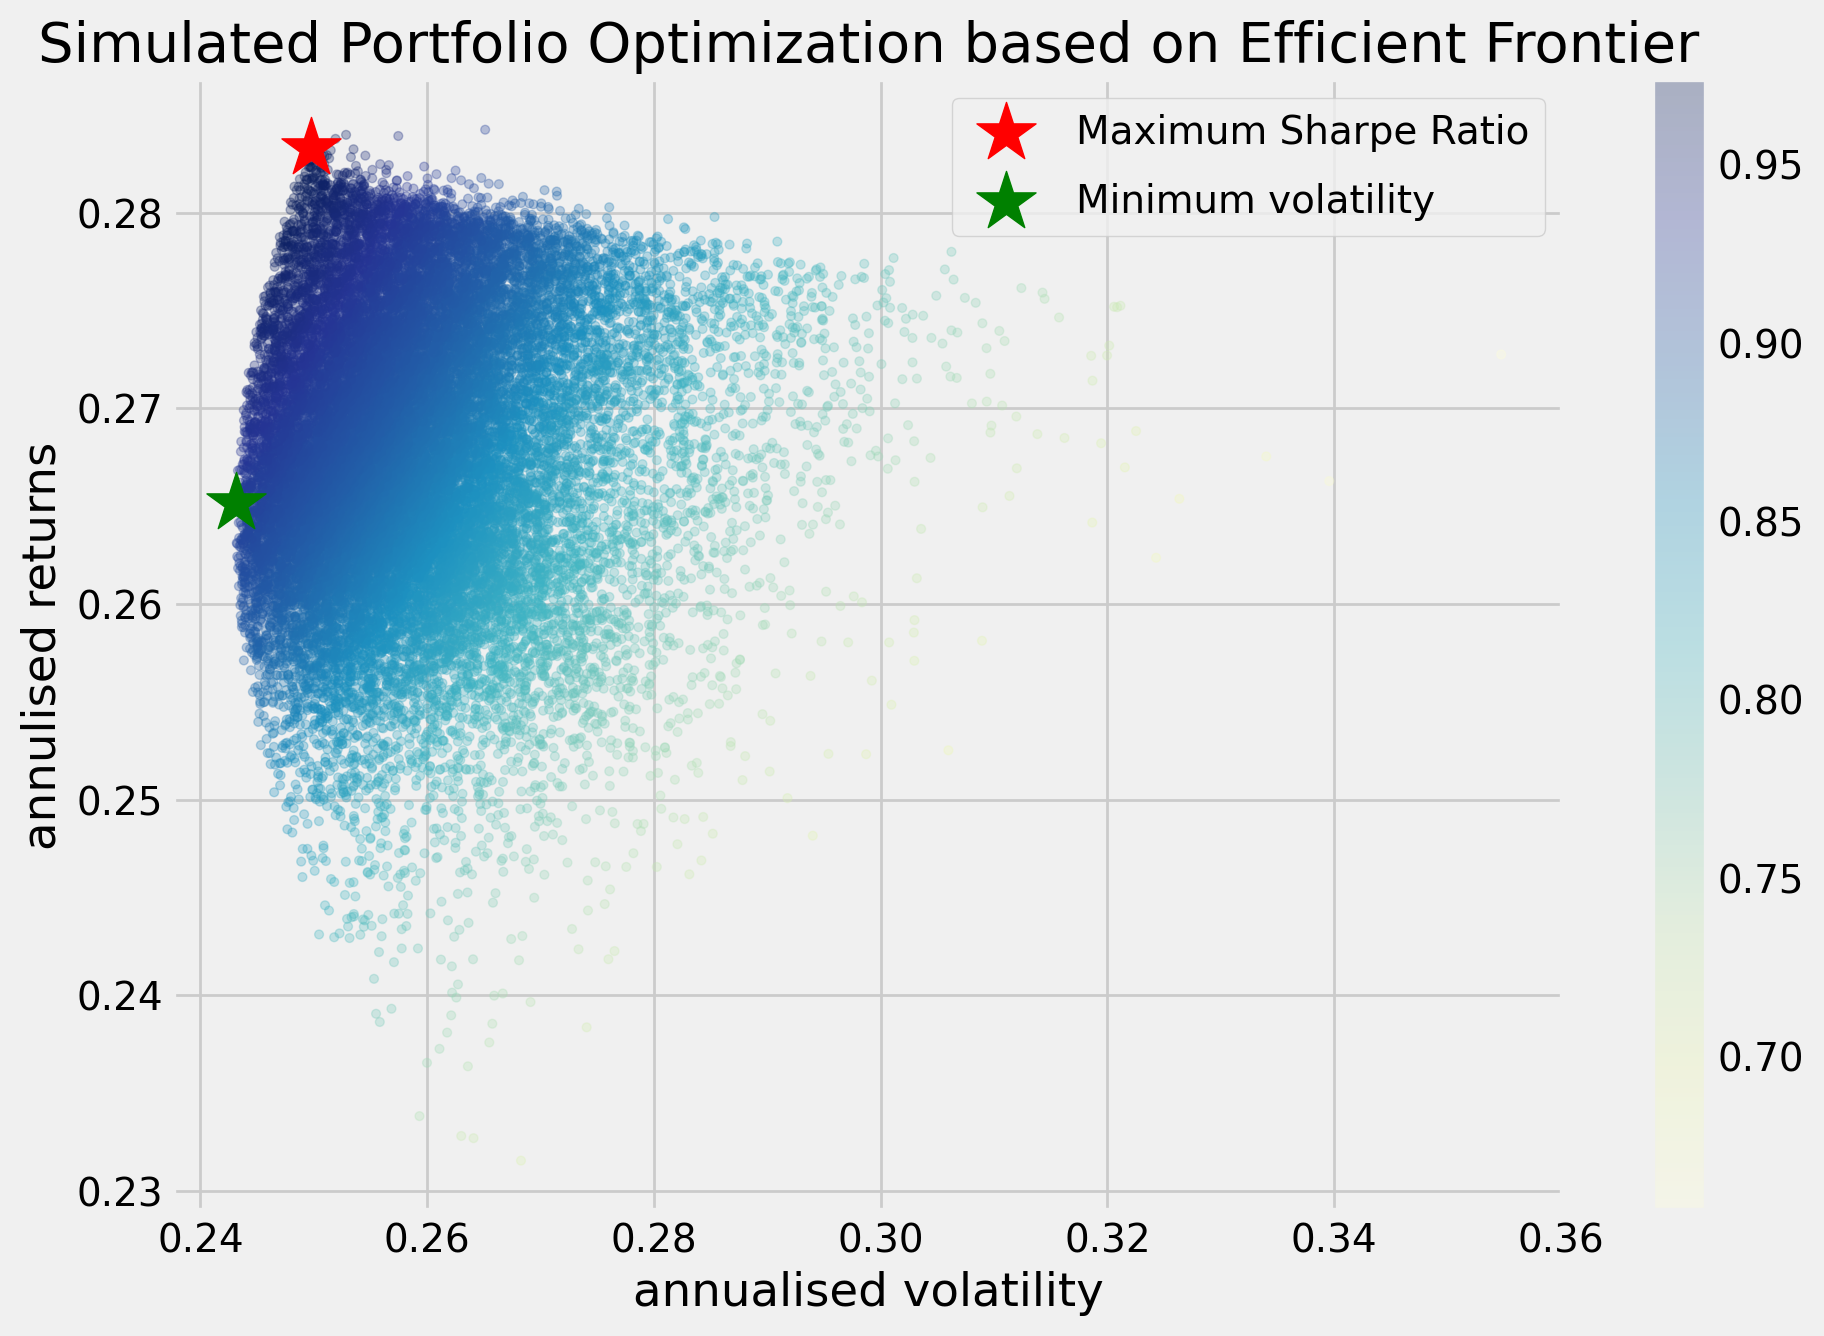

In [23]:
#New efficient frontier - Option 2 Using 25000 random portfolios and finding the max sharpe and min volatility allocations-----------------------------------------------------------------------------
# Reference https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

plt.style.use('fivethirtyeight')
np.random.seed(777)

#configure jupyter notebook to display Matplotlib in high-resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((4,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(5)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

#inputs for the varibles above
returns = stock_data_all.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.04

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=stock_data_all.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=stock_data_all.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annulised Return:", round(rp,2))
    print("Annulaised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annulised Return:", round(rp_min,2))
    print("Annulaised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r', s=500, label='Maximum Sharpe Ratio')
    plt.scatter(sdp_min,rp_min,marker='*', color='g', s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annulised returns')
    plt.legend(labelspacing=0.8)
    
#To display the frontier and data:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)